# Introduction to the workflow structure

This notebook gives a brief overview of the workflow structure and introduce some useful DataJoint tools to facilitate the exploration.
+ DataJoint needs to be pre-configured before running this notebook, if you haven't set up the configuration, refer to notebook [00-Set-up-configuration](00-Set-up-configuration.ipynb).
+ If you are familar with DataJoint and the workflow structure, proceed to the next notebook [02-process-ephys-workflow](02-process-ephys-workflow.ipynb) directly to run the workflow.
+ For a more thorough introduction of DataJoint functionings, please visit our [datajoint tutorial site](https://playground.datajoint.io) or [tutorials for BrainCogs U19 team](../tutorials/202103)

To load the local configuration, we will change the directory to the package root.

In [1]:
import os
os.chdir('..')

## Ephys related schemas and tables

The current workflow is composed of multiple database schemas, each of them corresponds to a module within the database.

Some of the schemas and tables are from `u19_pipeline`, and the ephys related schemas are from the [DataJoint Array Ephys Element](https://github.com/datajoint/element-array-ephys) installed in `u19_pipeline`.

In [11]:
import datajoint as dj
from u19_pipeline import subject, acquisition, ephys
from u19_pipeline.ephys_element import probe_element, ephys_element

+ Each module contains a schema object that enables interaction with the schema in the database.
+ The module `ephys` is the native 

In [3]:
probe_element.schema

Schema `u19_probe_element`

In [4]:
ephys_element.schema

Schema `u19_ephys_element`

+ The table classes in the module corresponds to a table in the schema in the database.

In [5]:
# preview table columns and contents in a table
ephys_element.EphysRecording()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz)


+ By importing the modules for the first time, the schemas and tables will be created inside the database.
+ Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.

## DataJoint tools to explore schemas and tables

+ `dj.list_schemas()`: list all schemas a user has access to in the current database

In [6]:
dj.list_schemas()

['U19_subject',
 'aarusso_pipeline',
 'aarusso_puffs',
 'aarusso_puffs_py',
 'aarusso_tutorial',
 'abondy_tutorial',
 'ahoag_admin_demo',
 'ahoag_admin_flask_demo',
 'ahoag_celery_test',
 'ahoag_lab_test',
 'ahoag_lightsheet_demo',
 'ahoag_microscope_demo',
 'ahoag_microscope_demo_old',
 'ahoag_puffs_acquisition_demo',
 'ahoag_puffs_behavior_demo',
 'ahoag_puffs_lab_demo',
 'ahoag_spockadmin_demo',
 'ahoag_test',
 'ahoag_test_db',
 'ahoag_test_django',
 'ahoag_tutorial',
 'alvaros_experiment',
 'brody_2pdemo',
 'brody_trash',
 'brody_tutorial2',
 'brody_tutorial3',
 'brody_tutorial5',
 'ckopec_tutorial_db',
 'diamanti_mesotables',
 'diamanti_tutorial',
 'dikshag_pipeline',
 'dikshag_tutorial',
 'gtm_testdb',
 'jounhong_session1',
 'jounhong_tutorial',
 'jyanar_tutorial3',
 'lpinto_tutorial',
 'ms81_tutorial',
 'mysql',
 'performance_schema',
 'pni_subject',
 'sf11_DTSC',
 'shans_acquisition',
 'shans_action',
 'shans_behavior',
 'shans_imaging',
 'shans_lab',
 'shans_neuro_ephys',
 'sh

+ `dj.Diagram()`: plot tables and dependencies. 

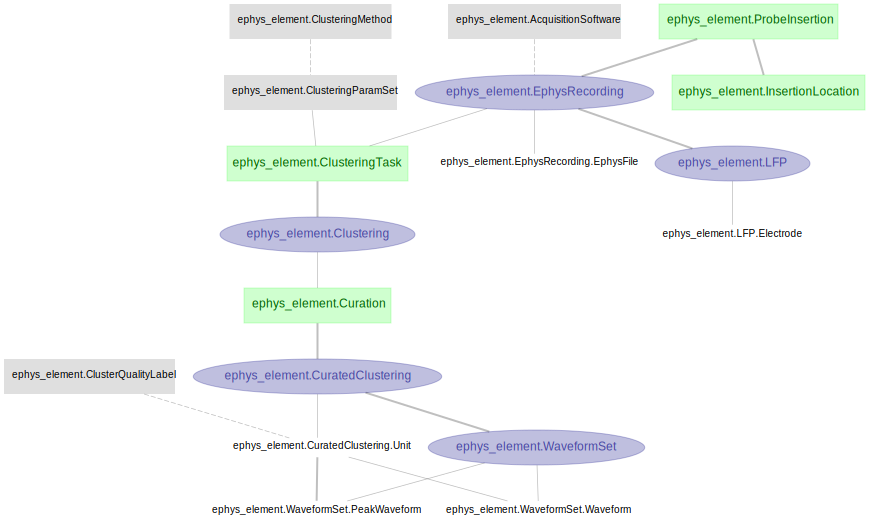

In [15]:
# plot diagram for all tables in a schema
dj.Diagram(ephys_element)

**Table tiers**: 

Manual table: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
Lookup table: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
Imported table: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
Computed table: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for data analyses.     
Part table: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

**Dependencies**:  

One-to-one primary: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
One-to-many primary: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
secondary dependency: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

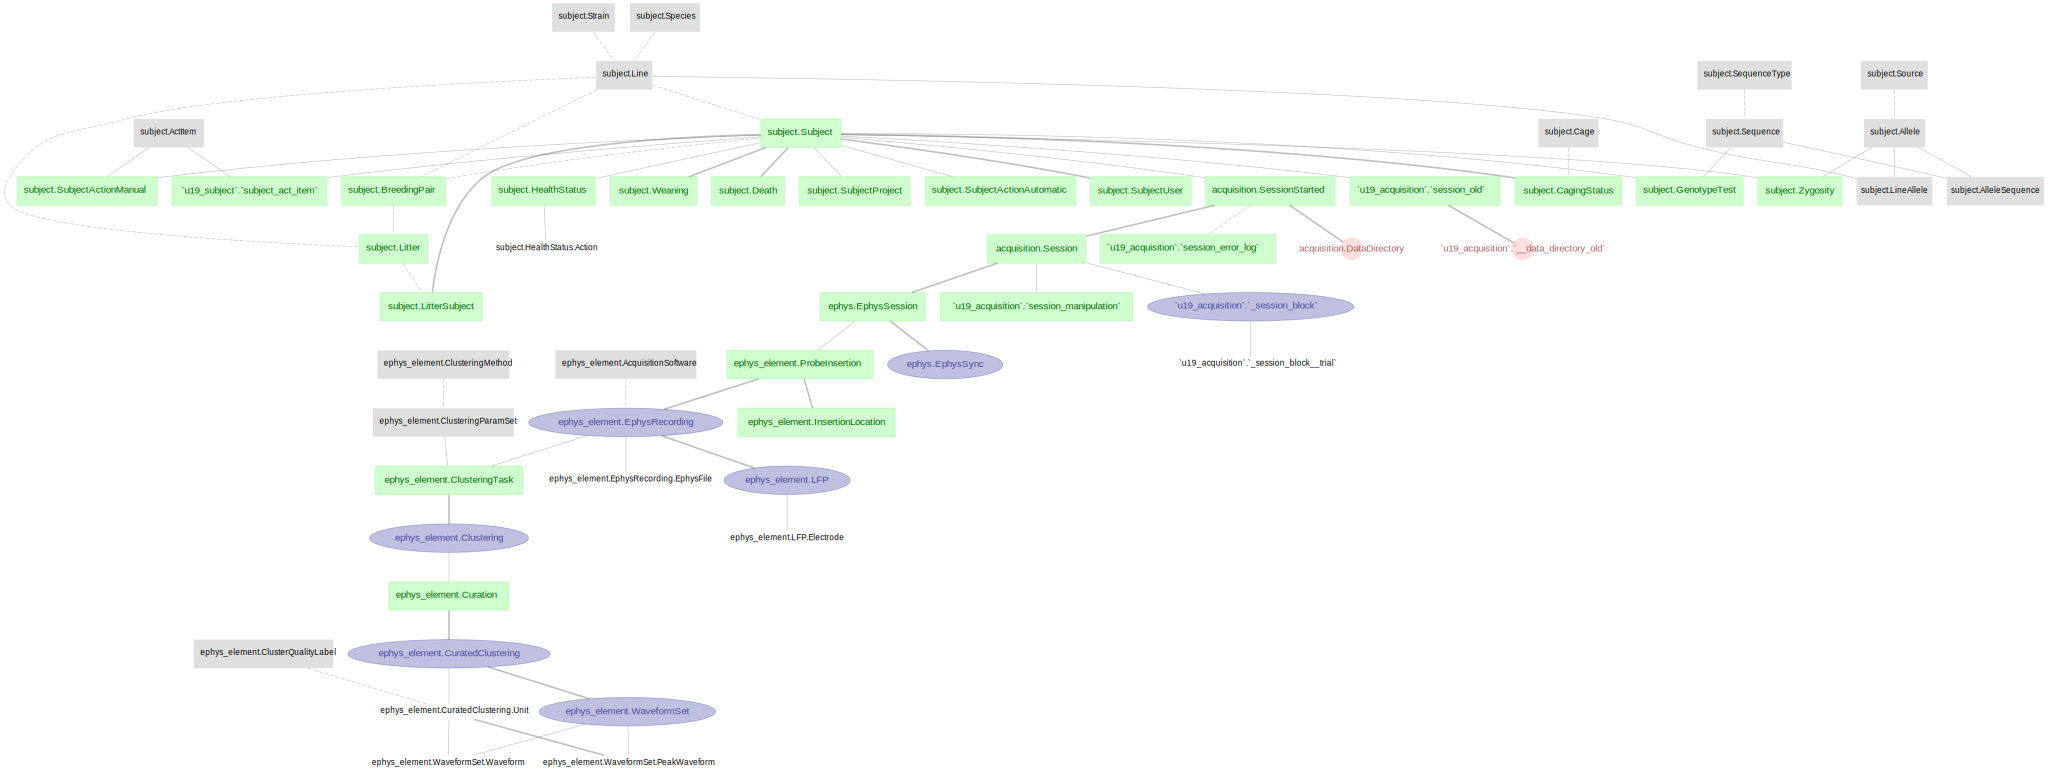

In [12]:
# plot diagram of tables in multiple schemas
dj.Diagram(subject) + dj.Diagram(acquisition) + dj.Diagram(ephys) + dj.Diagram(ephys_element)

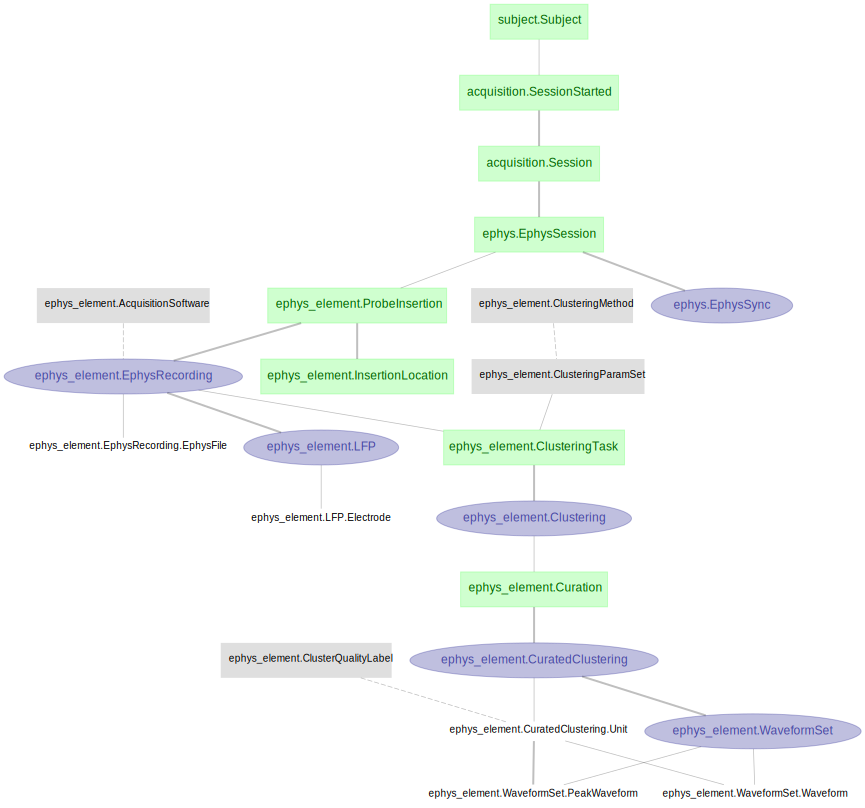

In [14]:
# plot diagram of selected tables and schemas
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(ephys) + dj.Diagram(ephys_element)

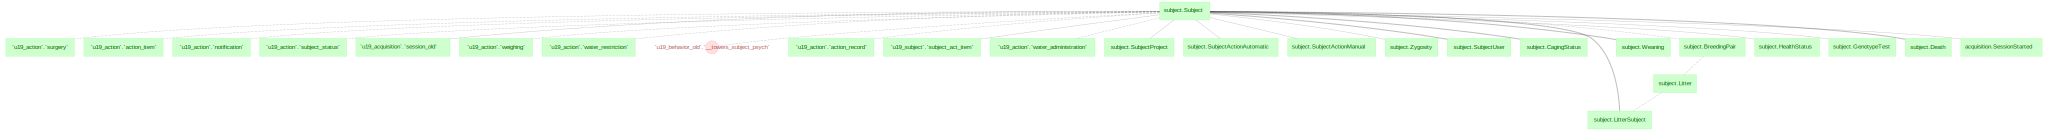

In [17]:
# plot diagram with 1 additional level of dependency downstream
dj.Diagram(subject.Subject) + 1

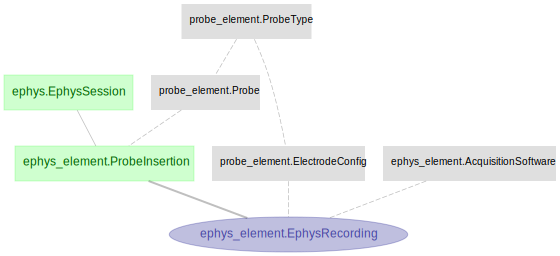

In [20]:
# plot diagram with 2 additional levels of dependency upstream
dj.Diagram(ephys_element.EphysRecording) - 2

+ `describe()`: show table definition with foreign key references.

In [22]:
ephys_element.EphysRecording.describe();

# Ephys recording from a probe insertion for a given session.
-> ephys_element.ProbeInsertion
---
-> probe_element.ElectrodeConfig
-> ephys_element.AcquisitionSoftware
sampling_rate        : float                        # (Hz)



+ `heading`: show attribute definitions regardless of foreign key references

In [23]:
ephys_element.EphysRecording.heading

# Ephys recording from a probe insertion for a given session.
subject_fullname     : varchar(64)                  # username_mouse_nickname
session_date         : date                         # date of experiment
session_number       : int                          # number
insertion_number     : tinyint unsigned             # 
---
electrode_config_hash : uuid                         # 
acq_software         : varchar(24)                  # 
sampling_rate        : float                        # (Hz)

# Major tables for the ephys workflow

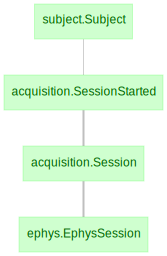

In [28]:
# subject, session, and ephys session
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(ephys.EphysSession)

In [29]:
subject.Subject.describe();

subject_fullname     : varchar(64)                  # username_mouse_nickname
---
subject_nickname     : varchar(16)                  
-> subject.lab.User
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> subject.lab.Location
-> [nullable] subject.lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



In [31]:
acquisition.SessionStarted.describe();

# General information of a session
-> subject.Subject
session_date         : date                         # date of experiment
session_number       : int                          # number
---
session_start_time   : datetime                     # start time
-> subject.lab.Location.proj(session_location="location")
-> acquisition.task.Task
local_path_behavior_file : varchar(255)                 # Path were session file is stored in local computer
remote_path_behavior_file : varchar(255)                 # Path were session file will be stored in bucket
is_finished=0        : tinyint                      # Flag that indicates if this session was finished successfully
invalid_session=0    : tinyint                      # Flag that indicates if behavioral file couldn't be saved for the session
%}



In [30]:
acquisition.Session.describe();

-> acquisition.SessionStarted
---
session_start_time   : datetime                     # start time
session_end_time=null : datetime                     # end time
-> subject.lab.Location.proj(session_location="location")
-> acquisition.task.TaskLevelParameterSet
stimulus_bank=""     : varchar(255)                 # path to the function to generate the stimulus
stimulus_commit=""   : varchar(64)                  # git hash for the version of the function
session_performance  : float                        # percentage correct on this session
num_trials=null      : int                          # Number of trials for the session
num_trials_try=null  : tinyblob                     # Accumulative number of trials for each try of the session
session_narrative="" : varchar(512)                 
session_protocol=null : varchar(255)                 # function and parameters to generate the stimulus
session_code_version=null : blob                         # code version of the stimulus, maybe a 

In [33]:
# saves the data directory ephys data
ephys.EphysSession.describe();

# General information of an ephys session
-> acquisition.Session
---
ephys_directory=""   : varchar(255)                 # Path were session file will be stored in bucket



+ [`ephys_element`](https://github.com/datajoint/element-array-ephys): Neuropixel based probe and ephys information. Check [this link](https://github.com/datajoint/element-array-ephys/tree/main/element_array_ephys) for definitions of the tables

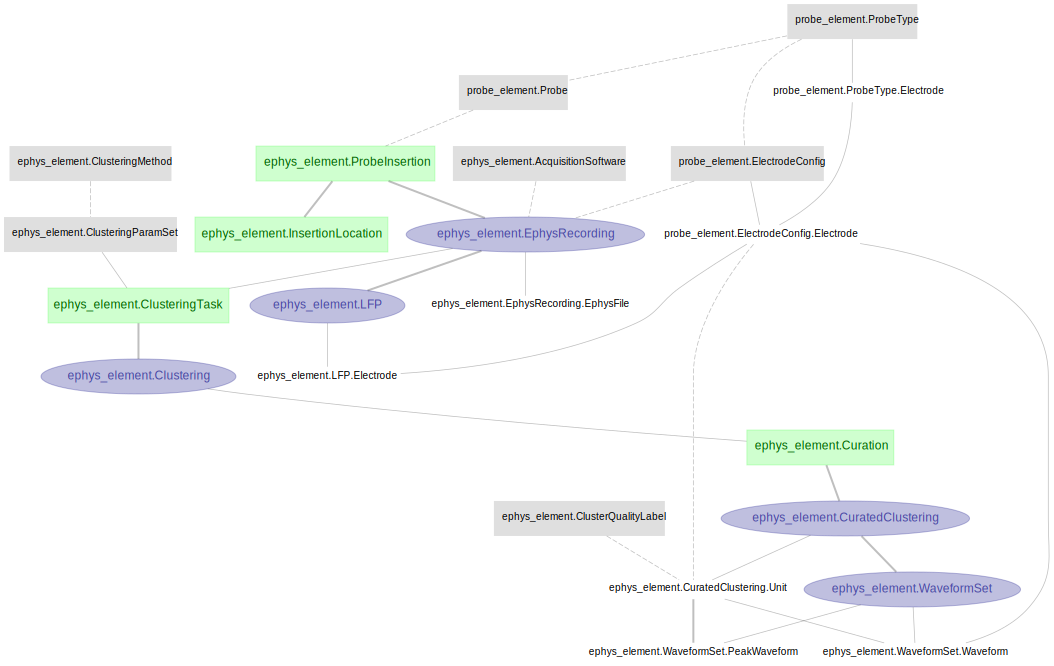

In [36]:
dj.Diagram(probe_element) + dj.Diagram(ephys_element)

## Summary and next step

+ This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

+ In the next notebook [02-process-ephys-workflow](02-process-ephys-workflow.ipynb), we will further introduce the detailed steps running through the pipeline and table contents accordingly.